In [1]:
import pandas as pd

In [23]:
data_path = '/Users/jk1/temp/preprocessed_mimic_data/extraction/lab_df.csv'
outcome_path = '/Users/jk1/temp/preprocessed_mimic_data/extraction/mortality_df.csv'
admission_data_path = '/Users/jk1/temp/preprocessed_mimic_data/extraction/admission_df.csv'
admission_notes_data_path ='/Users/jk1/Library/CloudStorage/OneDrive-unige.ch/stroke_research/geneva_stroke_unit_dataset/data/mimic_data/combined_notes_labels_v2.xlsx'
verbose = True

In [ ]:
lab_df = pd.read_csv(data_path)
outcome_df = pd.read_csv(outcome_path)


In [27]:
from mimic_admission_preprocessing import preprocess_admission


admission_data_df = preprocess_admission(admission_notes_data_path, admission_data_path, verbose=verbose)
admission_data_df['case_admission_id'] = admission_data_df['hadm_id'].astype(str) + '_' + admission_data_df['icustay_id'].astype(str)

Preprocessing age


In [30]:
admission_data_df.case_admission_id.nunique()

258

In [31]:
patient_selection = admission_data_df['case_admission_id'].unique()
lab_df['case_admission_id'] = lab_df['hadm_id'].astype(str) + '_' + lab_df['icustay_id'].astype(str)
lab_df = lab_df[lab_df['case_admission_id'].isin(patient_selection)]

In [45]:
from lab_preprocessing import mimic_preprocess_labs
import numpy as np
lactate_df = mimic_preprocess_labs(lab_df, selected_variables=['lactate'])

Excluding 0 values because non-numerical
Converting units


0it [00:00, ?it/s]

Excluding 0 observations because out of range
Median observations per case admission id:
          hadm_id  valuenum
label                      
lactate  152178.0       2.0
Descriptive statistics:
         count      mean       std  min  25%  50%  75%  max
label                                                      
lactate  321.0  1.713707  0.880092  0.5  1.1  1.6  2.1  6.0


In [46]:
lactate_df.valueuom.unique()

array(['mmol/l'], dtype=object)

In [47]:
lactate_df

Unnamed: 0  subject_id  hadm_id  icustay_id  itemid    label  \
11129         11129         746   117382      225829   50813  lactate   
55370         55370        3399   172999      206883   50813  lactate   
110128       110128        7103   192391      236665   50813  lactate   
110227       110227        7103   192391      236665   50813  lactate   
110306       110306        7103   192391      236665   50813  lactate   
...             ...         ...      ...         ...     ...      ...   
1102524     1102524       99863   100749      216757   50813  lactate   
1102525     1102525       99863   100749      216757   50813  lactate   
1102592     1102592       99863   100749      216757   50813  lactate   
1102608     1102608       99863   100749      216757   50813  lactate   
1102616     1102616       99863   100749      216757   50813  lactate   

                   charttime value  valuenum valueuom case_admission_id  \
11129    2159-11-26 08:41:00   1.4       1.4   mmol/l     117382_225829   
55370    2111-10-14 16:17:00   2.5       2.5   mmol/l     172999_206883   
110128   2174-10-01 21:24:00   2.1       2.1   mmol/l     192391_236665   
110227   2174-10-06 08:11:00   1.5       1.5   mmol/l     192391_236665   
110306   2174-09-28 20:21:00   1.7       1.7   mmol/l     192391_236665   
...                      ...   ...       ...      ...               ...   
1102524  2142-04-26 01:09:00   0.6       0.6   mmol/l     100749_216757   
1102525  2142-04-26 08:36:00   1.1       1.1   mmol/l     100749_216757   
1102592  2142-04-17 17:31:00   0.8       0.8   mmol/l     100749_216757   
1102608  2142-04-03 10:36:00   2.0       2.0   mmol/l     100749_216757   
1102616  2142-04-03 16:01:00   0.9       0.9   mmol/l     100749_216757   

         out_of_range  
11129           False  
55370           False  
110128          False  
110227          False  
110306          False  
...               ...  
1102524         False  
1102525         False  
1102592         False  
1102608         False  
1102616         False  

[321 rows x 12 columns]

<AxesSubplot:>

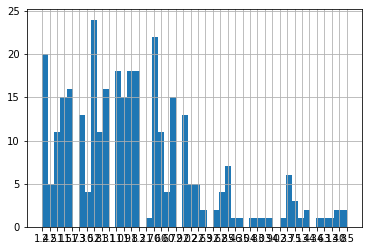

In [48]:
lactate_df.value.hist(bins=50)

In [49]:
admission_data_df

hadm_id  icustay_id           admittime sample_label           value  \
0      177056      229017 2190-04-03 20:33:00        NIHSS             5.0   
1      117382      225829 2159-11-26 09:33:00        NIHSS             9.0   
2      165042      245497 2167-02-17 19:48:00        NIHSS             5.0   
3      132614      295616 2179-07-22 16:58:00        NIHSS            16.0   
4      194499      288688 2118-08-21 15:51:00        NIHSS             6.0   
...       ...         ...                 ...          ...             ...   
6305   162636      221523                 NaT     Referral  Other hospital   
6328   135207      270875                 NaT     Referral  Other hospital   
6329   166869      270091                 NaT     Referral  Other hospital   
6334   101645      224088                 NaT     Referral  Other hospital   
6337   100749      216757                 NaT     Referral  Other hospital   

     case_admission_id  
0        177056_229017  
1        117382_225829  
2        165042_245497  
3        132614_295616  
4        194499_288688  
...                ...  
6305     162636_221523  
6328     135207_270875  
6329     166869_270091  
6334     101645_224088  
6337     100749_216757  

[5418 rows x 6 columns]

In [50]:
admission_notes_df = pd.read_excel(admission_notes_data_path)

In [51]:
admission_notes_df['case_admission_id'] = admission_notes_df['hadm_id'].astype(str) + '_' + admission_notes_df['icustay_id'].astype(str)
admission_notes_df['T0'] = admission_notes_df['stroke onset time'].replace('unknown', np.nan).fillna(admission_notes_df['admittime'])
lactate_df = lactate_df.merge(admission_notes_df[['case_admission_id', 'T0']], on='case_admission_id', how='left')

In [52]:
lactate_df

Unnamed: 0  subject_id  hadm_id  icustay_id  itemid    label  \
0         11129         746   117382      225829   50813  lactate   
1         55370        3399   172999      206883   50813  lactate   
2        110128        7103   192391      236665   50813  lactate   
3        110227        7103   192391      236665   50813  lactate   
4        110306        7103   192391      236665   50813  lactate   
..          ...         ...      ...         ...     ...      ...   
316     1102524       99863   100749      216757   50813  lactate   
317     1102525       99863   100749      216757   50813  lactate   
318     1102592       99863   100749      216757   50813  lactate   
319     1102608       99863   100749      216757   50813  lactate   
320     1102616       99863   100749      216757   50813  lactate   

               charttime value  valuenum valueuom case_admission_id  \
0    2159-11-26 08:41:00   1.4       1.4   mmol/l     117382_225829   
1    2111-10-14 16:17:00   2.5       2.5   mmol/l     172999_206883   
2    2174-10-01 21:24:00   2.1       2.1   mmol/l     192391_236665   
3    2174-10-06 08:11:00   1.5       1.5   mmol/l     192391_236665   
4    2174-09-28 20:21:00   1.7       1.7   mmol/l     192391_236665   
..                   ...   ...       ...      ...               ...   
316  2142-04-26 01:09:00   0.6       0.6   mmol/l     100749_216757   
317  2142-04-26 08:36:00   1.1       1.1   mmol/l     100749_216757   
318  2142-04-17 17:31:00   0.8       0.8   mmol/l     100749_216757   
319  2142-04-03 10:36:00   2.0       2.0   mmol/l     100749_216757   
320  2142-04-03 16:01:00   0.9       0.9   mmol/l     100749_216757   

     out_of_range                   T0  
0           False  2159-11-25 06:15:00  
1           False  2111-10-14 07:15:00  
2           False  2174-09-28 23:02:00  
3           False  2174-09-28 23:02:00  
4           False  2174-09-28 23:02:00  
..            ...                  ...  
316         False  2142-04-02 12:30:00  
317         False  2142-04-02 12:30:00  
318         False  2142-04-02 12:30:00  
319         False  2142-04-02 12:30:00  
320         False  2142-04-02 12:30:00  

[321 rows x 13 columns]

In [53]:
# '2159-11-26 08:41:00'
dt_format = '%Y-%m-%d %H:%M:%S'
lactate_df['relative_sample_date'] = (pd.to_datetime(lactate_df['charttime'], format=dt_format) - pd.to_datetime(lactate_df['T0'], format=dt_format)).dt.total_seconds() / 3600 # convert to hours


In [54]:
lactate_df['relative_sample_date_hcat'] = lactate_df['relative_sample_date'].apply(np.floor)

In [55]:
n_patients_with_lactate_in_first_24h = lactate_df[(lactate_df.relative_sample_date > -12) & (lactate_df.relative_sample_date < 24)].case_admission_id.nunique()
n_patients_with_lactate_in_24_to_72h = lactate_df[(lactate_df.relative_sample_date > 24) & (lactate_df.relative_sample_date < 3*24)].case_admission_id.nunique()

print(f'Number of patients with lactate in first 24h: {n_patients_with_lactate_in_first_24h}')
print(f'Number of patients with lactate in 24 to 72h: {n_patients_with_lactate_in_24_to_72h}')

Number of patients with lactate in first 24h: 70
Number of patients with lactate in 24 to 72h: 35


In [57]:
outcome_df['case_admission_id'] = outcome_df['hadm_id'].astype(str) + '_' + outcome_df['icustay_id'].astype(str)
# Preprocess In-hospital death
outcome_df['Death in hospital'] = pd.to_datetime(outcome_df['dod'], format=dt_format) <= pd.to_datetime(
    outcome_df['dischtime'], format=dt_format)
outcome_df['Death in hospital'] = outcome_df['Death in hospital'].astype(int)

# Preprocess 3M Death (3M = 3 months after admission)
outcome_df['3m_date'] = pd.to_datetime(outcome_df['admittime'], format=dt_format) + pd.DateOffset(months=3)
outcome_df['3M Death'] = pd.to_datetime(outcome_df['dod'], format=dt_format) <= pd.to_datetime(
    outcome_df['3m_date'], format=dt_format)
outcome_df['3M Death'] = outcome_df['3M Death'].astype(int)

In [58]:
outcome_df

Unnamed: 0  subject_id  hadm_id  icustay_id        age  \
0             0         124   172461      255660  69.638280   
1             1         124   172461      255660  69.638280   
2             2         124   172461      255660  69.638280   
3             3         352   121050      295983  75.198523   
4             4         352   121050      295983  75.198523   
..          ...         ...      ...         ...        ...   
848         848       99674   101645      224088  87.407319   
849         849       99814   186518      243902  86.596616   
850         850       99814   186518      243902  86.596616   
851         851       99863   100749      216757  42.694761   
852         852       99863   100749      216757  42.694761   

               admittime            dischtime         dod case_admission_id  \
0    2160-06-24 21:25:00  2160-07-15 15:10:00  2166-02-01     172461_255660   
1    2160-06-24 21:25:00  2160-07-15 15:10:00  2166-02-01     172461_255660   
2    2160-06-24 21:25:00  2160-07-15 15:10:00  2166-02-01     172461_255660   
3    2144-05-17 15:47:00  2144-05-21 11:15:00  2149-05-15     121050_295983   
4    2144-05-17 15:47:00  2144-05-21 11:15:00  2149-05-15     121050_295983   
..                   ...                  ...         ...               ...   
848  2105-06-12 19:45:00  2105-06-19 16:45:00         NaN     101645_224088   
849  2142-02-16 16:33:00  2142-02-21 16:38:00  2144-01-23     186518_243902   
850  2142-02-16 16:33:00  2142-02-21 16:38:00  2144-01-23     186518_243902   
851  2142-04-02 22:04:00  2142-05-08 13:47:00         NaN     100749_216757   
852  2142-04-02 22:04:00  2142-05-08 13:47:00         NaN     100749_216757   

     Death in hospital             3m_date  3M Death  
0                    0 2160-09-24 21:25:00         0  
1                    0 2160-09-24 21:25:00         0  
2                    0 2160-09-24 21:25:00         0  
3                    0 2144-08-17 15:47:00         0  
4                    0 2144-08-17 15:47:00         0  
..                 ...                 ...       ...  
848                  0 2105-09-12 19:45:00         0  
849                  0 2142-05-16 16:33:00         0  
850                  0 2142-05-16 16:33:00         0  
851                  0 2142-07-02 22:04:00         0  
852                  0 2142-07-02 22:04:00         0  

[853 rows x 12 columns]

In [59]:
lactate_df = lactate_df.merge(
    outcome_df[['case_admission_id', '3M Death']],
    on='case_admission_id',
    how='left'
)

In [60]:
early_lactate_df = lactate_df[(lactate_df.relative_sample_date > -12) & (lactate_df.relative_sample_date < 24)]
lactate_d2_df = lactate_df[(lactate_df.relative_sample_date > 24) & (lactate_df.relative_sample_date < 2*72)]
lactate_d3_df = lactate_df[(lactate_df.relative_sample_date > 2*24) & (lactate_df.relative_sample_date < 3*72)]
lactate_d_2_3_df = lactate_df[(lactate_df.relative_sample_date > 1*24) & (lactate_df.relative_sample_date < 3*72)]

In [63]:
# logistic regression lactate value to 3M Death
import statsmodels.api as sm
temp_df = early_lactate_df.dropna(subset=['value', '3M Death'])
temp_df['3M Death'] = temp_df['3M Death'].astype(int)  # Ensure binary outcome is int
temp_df['value'] = temp_df['value'].astype(float)  # Ensure value is float
X = sm.add_constant(temp_df['value'])
y = temp_df['3M Death']
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:               3M Death   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                 0.04202
Time:                        00:01:14   Log-Likelihood:                -105.83
converged:                       True   LL-Null:                       -110.47
Covariance Type:            nonrobust   LLR p-value:                  0.002312
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2217      0.484     -4.593      0.000      -3.170      -1.274
value          0.6842      0.230      2.980      0.003       0.234       1.134


In [64]:
# correlation of d2 lactate with outcome
temp_df = lactate_d2_df.dropna(subset=['value', '3M Death'])
temp_df['3M Death'] = temp_df['3M Death'].astype(int)  # Ensure binary outcome is int
temp_df['value'] = temp_df['value'].astype(float)  # Ensure value is float
X = sm.add_constant(temp_df['value'])
y = temp_df['3M Death']
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               3M Death   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                 0.01251
Time:                        00:01:37   Log-Likelihood:                -83.114
converged:                       True   LL-Null:                       -84.167
Covariance Type:            nonrobust   LLR p-value:                    0.1467
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1676      0.431     -5.029      0.000      -3.012      -1.323
value          0.3050      0.205      1.485      0.137      -0.097       0.707


In [65]:
# correlation of d3 lactate with outcome
temp_df = lactate_d3_df.dropna(subset=['value', '3M Death'])
temp_df['3M Death'] = temp_df['3M Death'].astype(int)  # Ensure binary outcome is int
temp_df['value'] = temp_df['value'].astype(float)  # Ensure value is float
X = sm.add_constant(temp_df['value'])
y = temp_df['3M Death']
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               3M Death   No. Observations:                  129
Model:                          Logit   Df Residuals:                      127
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                 0.06445
Time:                        00:01:54   Log-Likelihood:                -60.650
converged:                       True   LL-Null:                       -64.828
Covariance Type:            nonrobust   LLR p-value:                  0.003845
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5621      0.510     -5.028      0.000      -3.561      -1.563
value          0.6565      0.245      2.683      0.007       0.177       1.136


In [66]:
# correlation of d2-d3 lactate with outcome
temp_df = lactate_d_2_3_df.dropna(subset=['value', '3M Death'])
temp_df['3M Death'] = temp_df['3M Death'].astype(int)
temp_df['value'] = temp_df['value'].astype(float)  # Ensure value is float
X = sm.add_constant(temp_df['value'])
y = temp_df['3M Death']
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               3M Death   No. Observations:                  196
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                 0.03022
Time:                        00:02:21   Log-Likelihood:                -90.651
converged:                       True   LL-Null:                       -93.476
Covariance Type:            nonrobust   LLR p-value:                   0.01746
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2605      0.385     -5.870      0.000      -3.015      -1.506
value          0.4148      0.172      2.410      0.016       0.077       0.752
